In [1]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles
from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer
from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig
from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_music import experiment_music_conditional_config
from conditional_rate_matching.models.temporal_networks.temporal_networks_config import SequenceTransformerConfig
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig

/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.2-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Set Config

In [ ]:
device = 'cuda:2'

config:CRMConfig = experiment_music_conditional_config()
config.temporal_network = SequenceTransformerConfig(num_layers=5, num_heads=4)

experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial",
                                   experiment_indentifier=None)

config.trainer = CRMTrainerConfig(number_of_epochs=50,
                                  learning_rate=2e-4,
                                  metrics=[MetricsAvaliable.music_plot],
                                  max_test_size=30,
                                  clip_grad = True,
                                  clip_max_norm=1.0,
                                  warm_up=5000, 
                                  device = device)

config.thermostat.gamma = 1/129.
config.pipeline = BasicPipelineConfig(number_of_steps=1000)
config.optimal_transport = OptimalTransportSamplerConfig(name="OTSampler", method='sinkhorn', cost='log')


crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

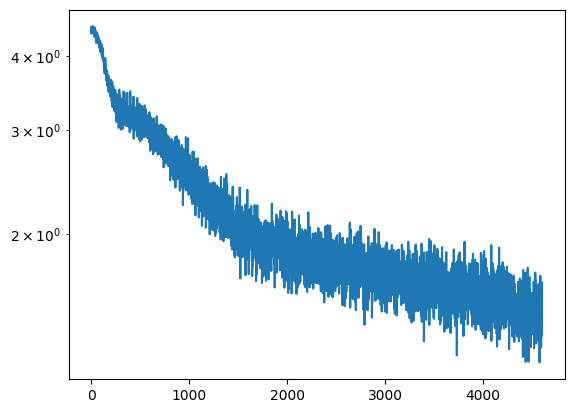

In [ ]:
# experiment_files = ExperimentFiles(experiment_dir=experiment_files.experiment_dir)
results_ = experiment_files.load_results()
plt.plot(results_["all_training_loss"])

plt.yscale("log")
plt.show()


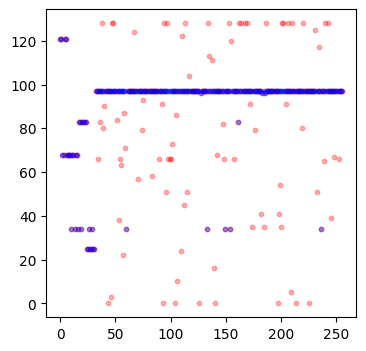

In [ ]:
crm_trainer.generative_model.pipeline.number_of_steps = 1000
crm_trainer.generative_model.config.pipeline.time_epsilon = 0.1

sample_x, sample_hist, t = crm_trainer.generative_model.pipeline(sample_size=100, train=False, return_path=True)
sample_x = sample_x.cpu()

time = range(0, 256)
time = torch.tensor(time)
idx=4

fig ,ax = plt.subplots(1,1,figsize=(4,4))
plt.scatter(time, sample_hist.cpu()[idx,-1,:].cpu(), s=10, c='r', marker='o', alpha=0.3)
plt.scatter(time, sample_x.cpu()[idx], s=10, c='b', marker='o', alpha=0.3)

plt.show()

# Read and Sample from a Model

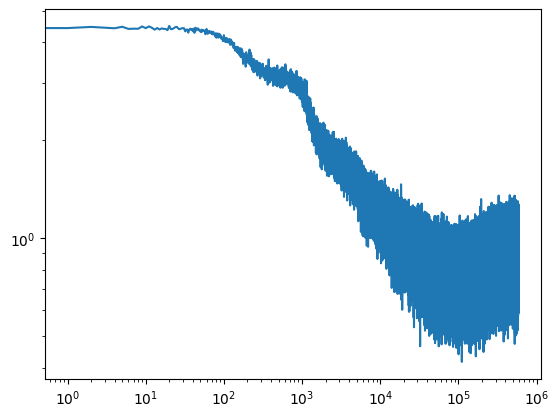

In [5]:
path  = '/home/df630/conditional_rate_matching/results/piano_roll_transformer_10k_epochs_uniform/crm/gamma_optimal'
# path = '/home/df630/conditional_rate_matching/results/piano_roll_transformer_10k_epochs_OTlog/crm/gamma_optimal'
experiment_files = ExperimentFiles(experiment_dir=path)
results_ = experiment_files.load_results(checkpoint=6250)

plt.plot(results_["all_training_loss"])
plt.xscale("log")
plt.yscale("log")
plt.show()

In [6]:
crm = CRM(experiment_dir=path, device='cpu')
crm.config.pipeline.number_of_steps = 100
crm.config.pipeline.time_epsilon = 0.01
x1, x_hist, t = crm.pipeline(sample_size=10, train=False, return_path=True)

100it [01:52,  1.12s/it]


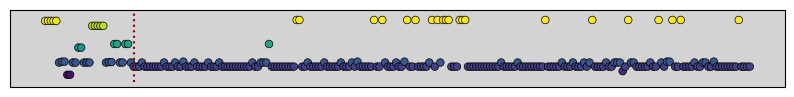

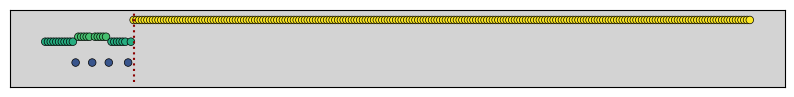

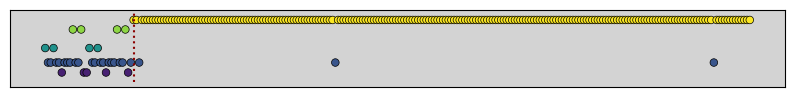

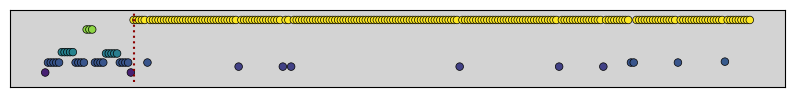

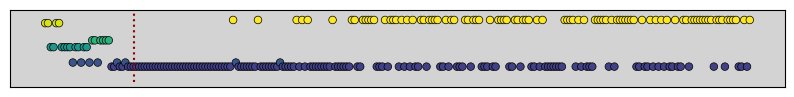

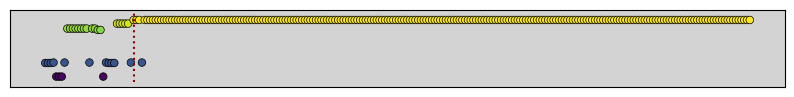

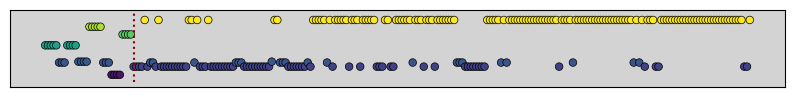

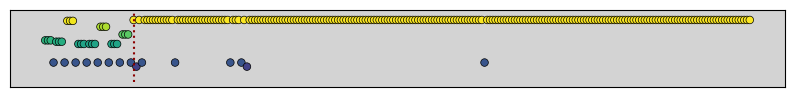

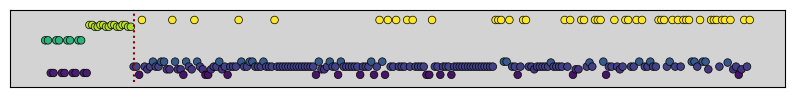

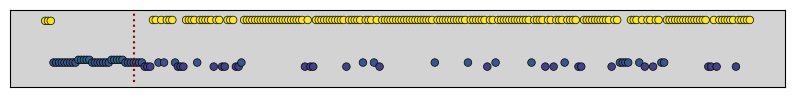

In [7]:
import matplotlib.colors as mcolors

time = range(0, 256)
time = torch.tensor(time)
N=0
idx=-10

# Define a colormap and normalize based on your Y value range
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=129)

for n in range(10):
    fig, ax = plt.subplots(1, 1, figsize=(10, 1))
    ax.vlines(32, ymin=-10, ymax=150, color='darkred', ls=':')
    # y_values = x_hist[n,-1,:].cpu().numpy()
    y_values = x1[n].cpu().numpy()
    colors = cmap(norm(y_values))
    scatter = ax.scatter(time, y_values, s=30, c=colors, marker='o', edgecolor='k', alpha=1, linewidths=0.5)
    ax.set_ylim(-20, 150)
    ax.set_facecolor('lightgray')  # Set the background color of the plot
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    plt.show()

# Calculate a Metric Again

In [ ]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [44]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
crm.config.pipeline.number_of_steps = 100
crm.config.data1.test_size 

log_metrics(crm, epoch=None, all_metrics = {}, metrics_to_log={metrics_avaliable.music_plot, metrics_avaliable.hellinger_distance, metrics_avaliable.outliers})

NameError: name 'log_metrics' is not defined

In [ ]:
for b in crm.dataloader_0.train():
    song_0  = b[0][0]
    time = range(0, 256)
    time = torch.tensor(time)
    break

for b in crm.dataloader_1.train():
    song_1 = b[0][0]
    break

### data